In [ ]:
import os
import numpy as np

/cw/dtaijupiter/NoCsBack/dtai/aras/Motif_Discovery/locomotif_dok_test/locomotif


In [ ]:
path_to_series = os.path.join("..", "examples", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)
series = (series - np.mean(series)) / np.std(series)
fs = 128  # sampling frequency

In [ ]:
# uncomment this code block for the multivariate ECG example:
path_to_series = os.path.join("..", "examples", "datasets", "mitdb_patient214.csv")
f = open(path_to_series)
series = np.array([line.split(',') for line in f.readlines()], dtype=np.double)
series = (series - np.mean(series, axis=None)) / np.std(series, axis=None)

fs = 360  # sampling frequency

In [4]:
print(series.shape)

(3600, 2)


In [5]:
# z-normalize time series
# series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.6

# Number of motifs to be found
nb_motifs = 2

# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0

In [6]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho=rho, nb=nb_motifs, overlap=overlap)
print(motif_sets)

[((2666, 2931), [(np.int32(2666), np.int32(2931)), (np.int32(1892), np.int32(2136)), (np.int32(1038), np.int32(1332)), (np.int32(3168), np.int32(3489)), (np.int32(2334), np.int32(2665)), (np.int32(628), np.int32(1035)), (np.int32(1589), np.int32(1892)), (np.int32(1), np.int32(260))]), ((1332, 1566), [(np.int32(1332), np.int32(1566)), (np.int32(2136), np.int32(2334)), (np.int32(2931), np.int32(3163))])]


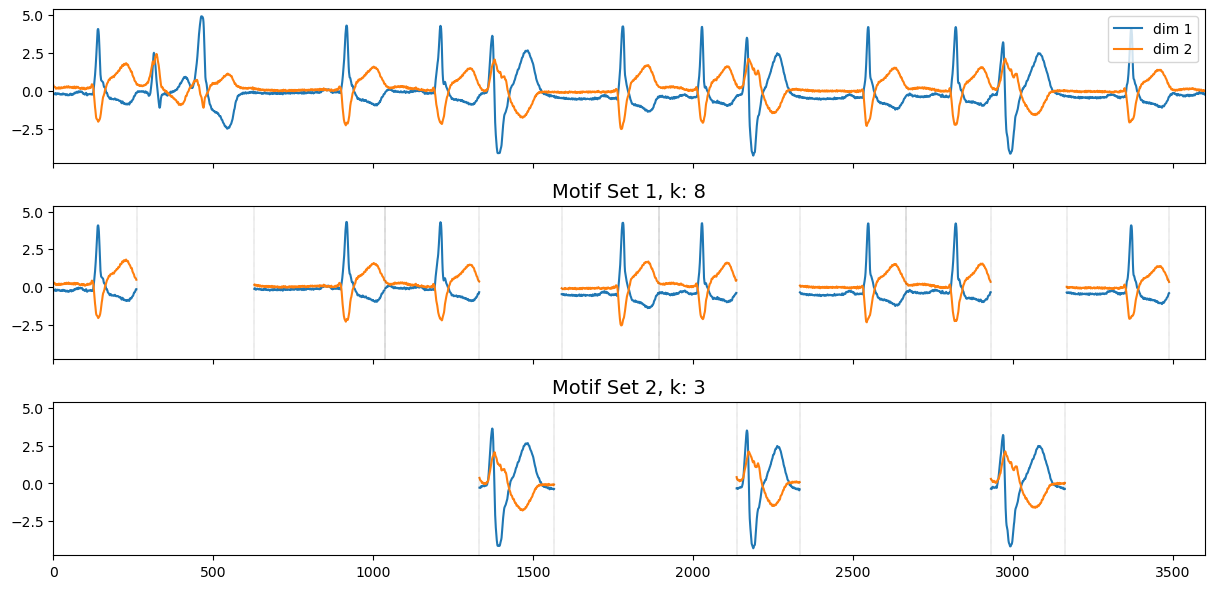

In [7]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Without Time Warping

In [8]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, warping=False)
print(motif_sets)

[((3230, 3500), [(np.int32(3230), np.int32(3500)), (np.int32(2408), np.int32(2678)), (np.int32(777), np.int32(1047)), (np.int32(2681), np.int32(2951)), (np.int32(0), np.int32(270)), (np.int32(1888), np.int32(2158)), (np.int32(1070), np.int32(1340))]), ((1354, 1633), [(np.int32(1354), np.int32(1633)), (np.int32(2951), np.int32(3230))])]


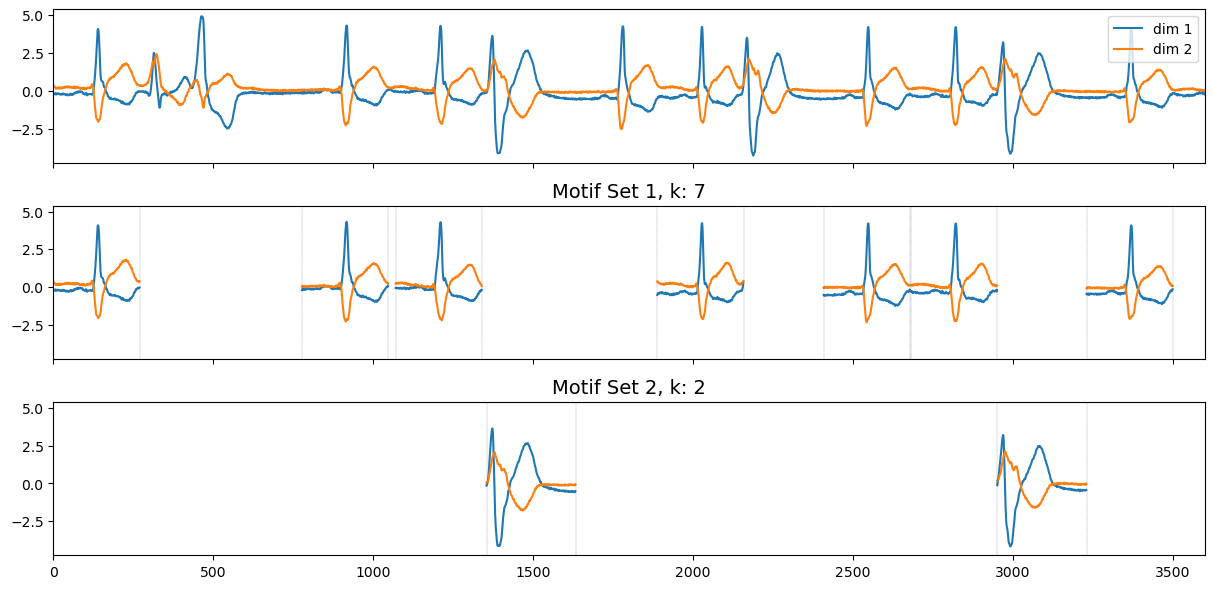

In [9]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Start and End Constraints

In [10]:
# start_mask specifies whether a motif can start at a certain time index (same for end_mask)

# for example: a candidate segment can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [11]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[((2666, 2931), [(np.int32(2666), np.int32(2931)), (np.int32(1892), np.int32(2136)), (np.int32(1038), np.int32(1332)), (np.int32(3168), np.int32(3489)), (np.int32(2334), np.int32(2665)), (np.int32(628), np.int32(1035)), (np.int32(1589), np.int32(1892)), (np.int32(1), np.int32(260))]), ((2931, 3156), [(np.int32(2931), np.int32(3156)), (np.int32(2136), np.int32(2334)), (np.int32(1332), np.int32(1559))])]


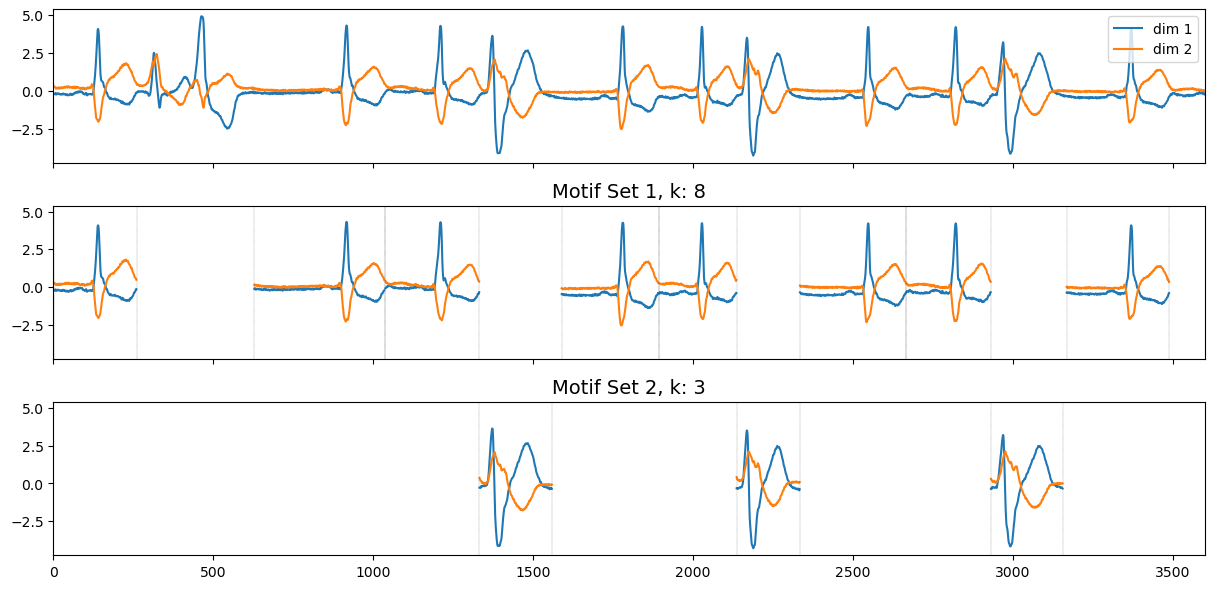

In [12]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()